#Go to Feature engineering and Arima Model.
*We have created a function to get the predicted value for the UHI Intensity in the feature engnieering.

### **Data Pre Processing**

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
# Load the datasets from CSV files

dallas = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Dallas.csv', header='infer' ,low_memory=False)
arlington = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Arlington.csv', header='infer' ,low_memory=False)
denton = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/project-final-Byte-Busters/main/data/Denton.csv', header='infer' ,low_memory=False)

In [3]:
# Convert the 'Date' column to datetime format
arlington['DATE'] = pd.to_datetime(arlington['DATE'])
dallas['DATE'] = pd.to_datetime(dallas['DATE'])
denton['DATE'] = pd.to_datetime(denton['DATE'])

In [4]:
cols_to_impute = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyRelativeHumidity','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindSpeed','HourlyWindDirection']

 **Dallas**

In [5]:
dallas.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72258013960,2022-01-01 00:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
1,72258013960,2022-01-01 01:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.64,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
2,72258013960,2022-01-01 02:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.63,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
3,72258013960,2022-01-01 03:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.63,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28
4,72258013960,2022-01-01 04:53:00,32.83839,-96.83583,147.6,"DALLAS FAA AIRPORT, TX US",FM-15,7,29.62,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-28


In [6]:
dallas.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlyWetBulbTemperature,HourlyWindGustSpeed,...,ShortDurationPrecipitationValue180,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.053600e+04,10536.00000,10536.00000,1.053600e+04,10536.000000,2899.000000,2899.000000,10150.000000,10058.000000,3159.000000,...,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.225801e+10,32.83839,-96.83583,1.476000e+02,6.916002,-0.000114,4.208348,61.352512,58.328097,25.155112,...,1.387500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.00000,0.00000,2.842306e-14,0.358855,0.045213,2.737678,21.693770,15.638864,5.774307,...,1.423725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.225801e+10,32.83839,-96.83583,1.476000e+02,4.000000,-0.250000,0.000000,12.000000,8.000000,16.000000,...,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,-0.030000,1.000000,44.000000,47.000000,21.000000,...,0.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.000000,3.000000,61.000000,62.000000,24.000000,...,1.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.030000,6.000000,79.000000,73.000000,29.000000,...,1.465000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.225801e+10,32.83839,-96.83583,1.476000e+02,7.000000,0.170000,8.000000,100.000000,81.000000,52.000000,...,4.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Specifying columns for data type conversion\

cols_dallas = ['HourlyDryBulbTemperature','HourlyDewPointTemperature','HourlyPrecipitation','HourlySeaLevelPressure','HourlyStationPressure','HourlyWindDirection']

In [8]:
# Loop through columns in cols_dallas, extract the numeric part, and convert to float

for col in cols_dallas:
    dallas[col] = dallas[col].str.extract('(\d+)', expand=False).astype(float)

In [9]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = dallas[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 384
Missing values in HourlyWetBulbTemperature: 478
Missing values in HourlyRelativeHumidity: 386
Missing values in HourlyDewPointTemperature: 386
Missing values in HourlyPrecipitation: 1884
Missing values in HourlySeaLevelPressure: 1801
Missing values in HourlyStationPressure: 476
Missing values in HourlyWindSpeed: 388
Missing values in HourlyWindDirection: 1090


In [10]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
dallas[cols_to_impute] = imputer.fit_transform(dallas[cols_to_impute])

In [11]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = dallas[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


**Arlington**

In [12]:
arlington.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72247953907,2022-01-01 00:18:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-16,7,29.66,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
1,72247953907,2022-01-01 00:27:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-16,7,29.66,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
2,72247953907,2022-01-01 00:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
3,72247953907,2022-01-01 01:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.65,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26
4,72247953907,2022-01-01 02:53:00,32.65832,-97.09509,179.7,"ARLINGTON MUNICIPAL AIRPORT, TX US",FM-15,7,29.63,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-26


In [13]:
arlington.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyWindGustSpeed,Sunrise,Sunset,...,ShortDurationPrecipitationValue150,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.093800e+04,10938.00000,1.093800e+04,1.093800e+04,10938.000000,2863.000000,2863.000000,2851.000000,365.000000,365.000000,...,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,6.904553,0.000014,4.223192,26.471414,619.610959,1836.087671,...,0.935833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,0.00000,1.421150e-14,2.842301e-14,0.404595,0.044873,2.748253,5.985668,75.262156,78.326753,...,1.013934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,4.000000,-0.240000,0.000000,16.000000,520.000000,1722.000000,...,0.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,-0.030000,1.000000,22.000000,542.000000,1750.000000,...,0.195000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.000000,3.000000,25.000000,620.000000,1836.000000,...,0.710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.030000,6.000000,30.000000,705.000000,1918.000000,...,1.155000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.224795e+10,32.65832,-9.709509e+01,1.797000e+02,7.000000,0.160000,8.000000,59.000000,731.000000,1940.000000,...,3.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Specifying columns for data type conversion

cols_arlington = ['HourlyDryBulbTemperature','HourlyWetBulbTemperature','HourlyDewPointTemperature','HourlyStationPressure','HourlyPrecipitation','HourlyWindSpeed','HourlySeaLevelPressure','HourlyWindDirection', 'HourlyRelativeHumidity']

In [15]:
# Loop through columns in cols_arlington, extract the numeric part, and convert to float

for col in cols_arlington:
    arlington[col] = arlington[col].str.extract('(\d+)', expand=False).astype(float)

In [16]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = arlington[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 398
Missing values in HourlyWetBulbTemperature: 549
Missing values in HourlyRelativeHumidity: 398
Missing values in HourlyDewPointTemperature: 398
Missing values in HourlyPrecipitation: 2410
Missing values in HourlySeaLevelPressure: 2251
Missing values in HourlyStationPressure: 529
Missing values in HourlyWindSpeed: 482
Missing values in HourlyWindDirection: 836


In [17]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
arlington[cols_to_impute] = imputer.fit_transform(arlington[cols_to_impute])

In [18]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = arlington[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


**Denton**

In [19]:
denton.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,72258903991,2022-01-01 00:18:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-16,7,29.66,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
1,72258903991,2022-01-01 00:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.66,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
2,72258903991,2022-01-01 01:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
3,72258903991,2022-01-01 02:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27
4,72258903991,2022-01-01 03:53:00,33.20883,-97.19922,194.6,"DENTON MUNICPAL AIRPORT, TX US",FM-15,7,29.63,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-27


In [20]:
denton.describe()

,STATION,LATITUDE,LONGITUDE,ELEVATION,SOURCE,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyWetBulbTemperature,...,ShortDurationPrecipitationValue180,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName
count,1.080800e+04,1.080800e+04,1.080800e+04,1.080800e+04,10808.000000,2919.000000,2919.000000,10423.000000,8750.000000,10292.000000,...,11.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,6.906643,-0.000106,4.254539,64.744891,30.012730,56.977264,...,0.852727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,7.105756e-15,2.842302e-14,5.684605e-14,0.395309,0.045438,2.732153,22.760395,0.215588,16.311701,...,0.693903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,4.000000,-0.270000,0.000000,12.000000,29.370000,7.000000,...,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,-0.030000,2.000000,47.000000,29.880000,45.000000,...,0.345000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.000000,3.000000,67.000000,29.980000,61.000000,...,0.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.030000,6.000000,84.000000,30.130000,72.000000,...,1.280000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.225890e+10,3.320883e+01,-9.719922e+01,1.946000e+02,7.000000,0.170000,8.000000,100.000000,30.820000,80.000000,...,2.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Specifying columns for data type conversion

cols_denton = ['HourlyDryBulbTemperature','HourlyDewPointTemperature','HourlyStationPressure','HourlyPrecipitation','HourlyWindSpeed','HourlyWindDirection']

In [22]:
# Loop through columns in cols_denton, extract the numeric part, and convert to float

for col in cols_denton:
    denton[col] = denton[col].str.extract('(\d+)', expand=False).astype(float)

In [23]:
# Checking for missing values in all the relevant columns

for col in cols_to_impute:
    missing_values = denton[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 385
Missing values in HourlyWetBulbTemperature: 516
Missing values in HourlyRelativeHumidity: 385
Missing values in HourlyDewPointTemperature: 383
Missing values in HourlyPrecipitation: 2059
Missing values in HourlySeaLevelPressure: 2058
Missing values in HourlyStationPressure: 508
Missing values in HourlyWindSpeed: 434
Missing values in HourlyWindDirection: 693


In [24]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
denton[cols_to_impute] = imputer.fit_transform(denton[cols_to_impute])

In [25]:
# Checking for missing values in all the relevant columns after Imputation

for col in cols_to_impute:
    missing_values = denton[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in HourlyDryBulbTemperature: 0
Missing values in HourlyWetBulbTemperature: 0
Missing values in HourlyRelativeHumidity: 0
Missing values in HourlyDewPointTemperature: 0
Missing values in HourlyPrecipitation: 0
Missing values in HourlySeaLevelPressure: 0
Missing values in HourlyStationPressure: 0
Missing values in HourlyWindSpeed: 0
Missing values in HourlyWindDirection: 0


### **EDA: Exploratory Data Analysis**

In [26]:
def extract_time_features(df):
    df['Hour'] = df['DATE'].dt.hour
    df['DayOfWeek'] = df['DATE'].dt.dayofweek
    df['Month'] = df['DATE'].dt.month
    df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)
    seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['Season'] = df['Season'].map(seasons)

# Apply the time feature extraction to each dataset
extract_time_features(arlington)
extract_time_features(dallas)
extract_time_features(denton)

**Basic Statistical Tests**

In [27]:
# For Dallas
print("Basic Statistics for Dallas:")
print(dallas[['HourlyDryBulbTemperature','HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())


Basic Statistics for Dallas:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10536.000000              10536.000000   
mean                  67.197414                 58.333991   
std                   18.608601                 15.293785   
min                   11.000000                  8.000000   
25%                   55.000000                 48.000000   
50%                   68.000000                 61.000000   
75%                   81.000000                 72.000000   
max                  107.000000                 81.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10536.000000         10536.000000            10536.000000   
mean                   51.414822             0.001489               29.453747   
std                    17.581486             0.033942                0.470971   
min                     0.000000             0.000000               29.000000   
25%             

In [28]:
# For Arlington
print("Basic Statistics for Arlington:")
print(arlington[['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())

Basic Statistics for Arlington:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10938.000000              10938.000000   
mean                  66.799237                 58.075903   
std                   18.621383                 15.162909   
min                   11.000000                  8.000000   
25%                   54.250000                 48.000000   
50%                   68.000000                 61.000000   
75%                   80.000000                 72.000000   
max                  108.000000                 79.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10938.000000         10938.000000            10938.000000   
mean                   51.249222             0.001719               29.441497   
std                    17.430900             0.040534                0.465324   
min                     0.000000             0.000000               29.000000   
25%          

In [29]:
# For Denton
print("Basic Statistics for Denton:")
print(denton[['HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'HourlyDewPointTemperature', 'HourlyPrecipitation',
              'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyRelativeHumidity',
              'HourlyWindSpeed', 'HourlyWindDirection']].describe())

Basic Statistics for Denton:
       HourlyDryBulbTemperature  HourlyWetBulbTemperature  \
count              10808.000000              10808.000000   
mean                  65.053764                 56.960310   
std                   19.644345                 15.936749   
min                   10.000000                  7.000000   
25%                   52.000000                 46.000000   
50%                   66.000000                 60.000000   
75%                   80.000000                 71.000000   
max                  110.000000                 80.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlySeaLevelPressure  \
count               10808.000000         10808.000000            10808.000000   
mean                   50.681699             0.000230               30.005838   
std                    17.623262             0.013871                0.202828   
min                     0.000000             0.000000               29.370000   
25%             

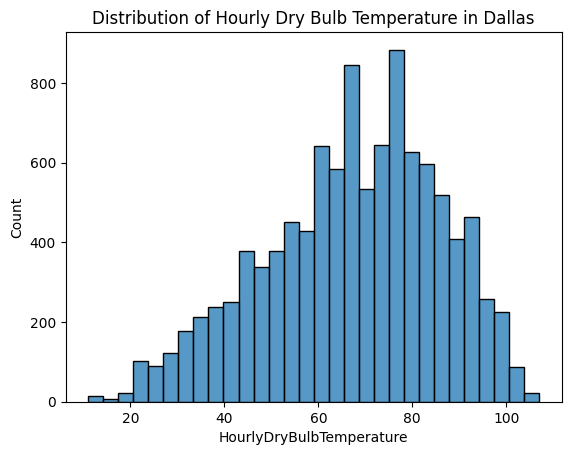

In [30]:
# Example histogram for temperature
sns.histplot(dallas['HourlyDryBulbTemperature'], bins=30)
plt.title('Distribution of Hourly Dry Bulb Temperature in Dallas')
plt.show()

Temperature difference based on different times of the day

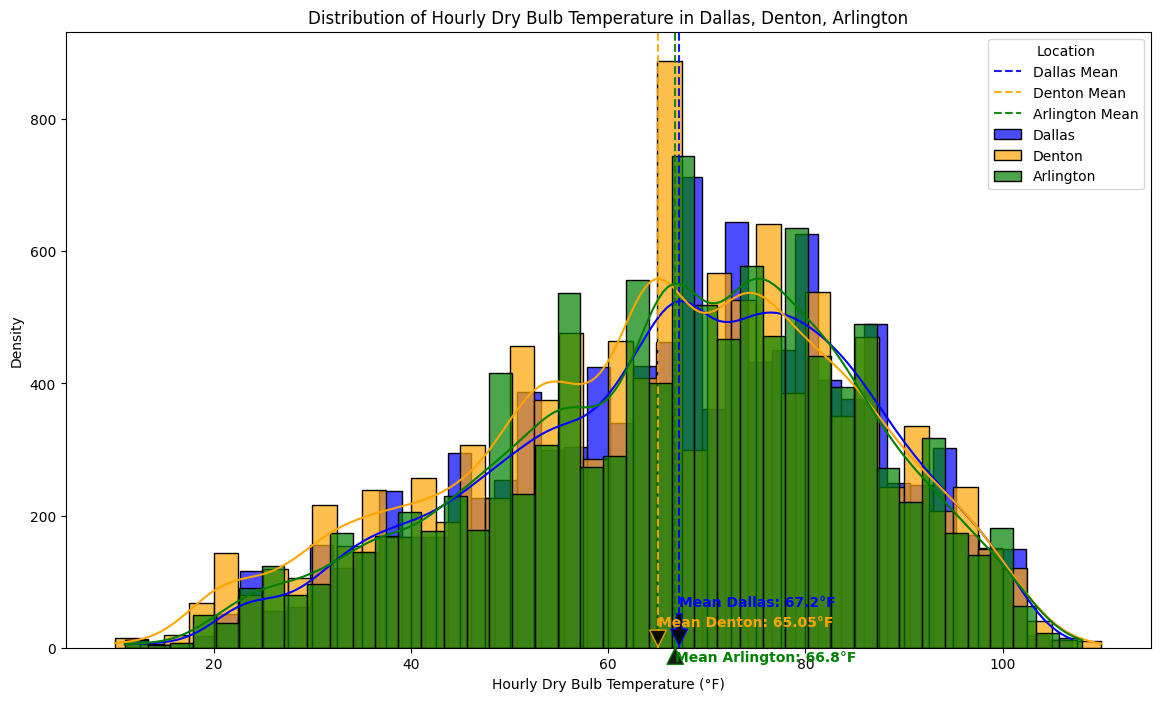

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visualization
custom_palette = ['blue', 'orange', 'green']

# Example: UHI intensity distribution for all locations
plt.figure(figsize=(14, 8))

# Define a dictionary to store locations and dataframes
locations = {'Dallas': dallas, 'Denton': denton, 'Arlington': arlington}

# Use a density plot (Kernel Density Estimate) for a smoother representation of the distribution
for loc, color in zip(locations.keys(), custom_palette):
    sns.histplot(data=locations[loc], x='HourlyDryBulbTemperature', kde=True, label=loc, color=color, alpha=0.7)
    # Add vertical lines to represent mean temperatures for each location
    plt.axvline(x=locations[loc]['HourlyDryBulbTemperature'].mean(), linestyle='--', color=color, label=f'{loc} Mean', alpha=0.9)

plt.title('Distribution of Hourly Dry Bulb Temperature in Dallas, Denton, Arlington')
plt.xlabel('Hourly Dry Bulb Temperature (°F)')
plt.ylabel('Density')
plt.legend(title='Location')

# Annotate mean temperatures with arrows
for loc, color, offset in zip(locations.keys(), custom_palette, [30, 15, -10]):
    plt.annotate(f'Mean {loc}: {round(locations[loc]["HourlyDryBulbTemperature"].mean(), 2)}°F',
                 xy=(locations[loc]['HourlyDryBulbTemperature'].mean(), 0),
                 xytext=(0, offset), textcoords='offset points',
                 arrowprops=dict(facecolor='black', edgecolor=color, shrink=0.05, alpha=0.9),
                 color=color, weight='bold')

plt.show()


In [32]:
def categorize_day_night(hour):
    if 6 <= hour < 18:
        return 'Daytime'
    else:
        return 'Nighttime'

# Apply this function to your datasets
arlington['Day_Night'] = arlington['Hour'].apply(categorize_day_night)
dallas['Day_Night'] = dallas['Hour'].apply(categorize_day_night)
denton['Day_Night'] = denton['Hour'].apply(categorize_day_night)

In [33]:
# Calculate average temperatures
arlington_day_night_avg = arlington.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
dallas_day_night_avg = dallas.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()
denton_day_night_avg = denton.groupby('Day_Night')['HourlyDryBulbTemperature'].mean()


In [34]:
# Display the average temperatures
print("Arlington - Day vs Night Avg Temperature:\n", arlington_day_night_avg)
print("Dallas - Day vs Night Avg Temperature:\n", dallas_day_night_avg)
print("Denton - Day vs Night Avg Temperature:\n", denton_day_night_avg)


Arlington - Day vs Night Avg Temperature:
 Day_Night
Daytime      70.285486
Nighttime    63.472445
Name: HourlyDryBulbTemperature, dtype: float64
Dallas - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.709055
Nighttime    64.807656
Name: HourlyDryBulbTemperature, dtype: float64
Denton - Day vs Night Avg Temperature:
 Day_Night
Daytime      69.248691
Nighttime    61.061842
Name: HourlyDryBulbTemperature, dtype: float64


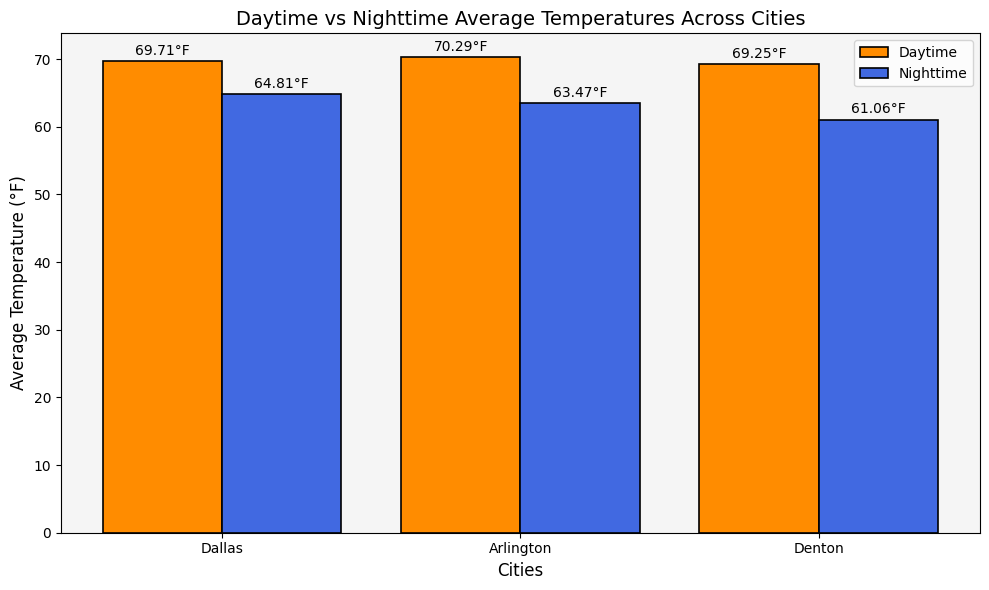

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Set up for multiple bar plot
bar_width = 0.4  # width of the bars
index = np.arange(3)  # Three cities

# Data
daytime_temps = [dallas_day_night_avg['Daytime'], arlington_day_night_avg['Daytime'], denton_day_night_avg['Daytime']]
nighttime_temps = [dallas_day_night_avg['Nighttime'], arlington_day_night_avg['Nighttime'], denton_day_night_avg['Nighttime']]

# Colors
daytime_color = '#FF8C00'  # Dark Orange
nighttime_color = '#4169E1'  # Royal Blue

# Creating the plot with improved styling
plt.figure(figsize=(10, 6))

# Daytime bars
plt.bar(index, daytime_temps, bar_width, color=daytime_color, label='Daytime', edgecolor='black', linewidth=1.2)

# Nighttime bars
plt.bar(index + bar_width, nighttime_temps, bar_width, color=nighttime_color, label='Nighttime', edgecolor='black', linewidth=1.2)

# Adding data labels
for i, temp in enumerate(daytime_temps):
    plt.text(i, temp + 0.5, f"{temp:.2f}°F", ha='center', va='bottom', fontsize=10, color='black')

for i, temp in enumerate(nighttime_temps):
    plt.text(i + bar_width, temp + 0.5, f"{temp:.2f}°F", ha='center', va='bottom', fontsize=10, color='black')

# Styling and labels
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Average Temperature (°F)', fontsize=12)
plt.title('Daytime vs Nighttime Average Temperatures Across Cities', fontsize=14)
plt.xticks(index + bar_width / 2, ['Dallas', 'Arlington', 'Denton'], fontsize=10)
plt.legend()

# Adding a background color for visual appeal
plt.gca().set_facecolor('#F5F5F5')

# Show the plot
plt.tight_layout()
plt.show()


**Key Takeaways:**

*   The smaller difference in nighttime and daytime temperatures in Dallas aligns with a stronger UHI effect, where the urban environment retains more heat.
*   Arlington, while also urban, shows a slightly more significant temperature drop at night than Dallas, indicating a somewhat less intense UHI effect.

*  Denton’s larger temperature drop is consistent with rural areas that do not exhibit strong UHI effects.

In [36]:
# Function to plot data
def plot_data(data, city_name):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data['HourlyDryBulbTemperature'])
    plt.title(f'{city_name} Temperature')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=data['HourlyRelativeHumidity'])
    plt.title(f'{city_name} Humidity')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data['HourlyWindSpeed'])
    plt.title(f'{city_name} Wind Speed')

    plt.tight_layout()
    plt.show()


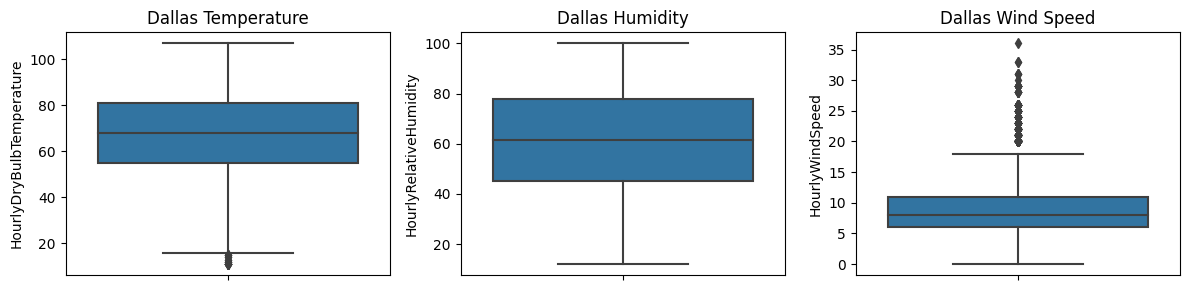

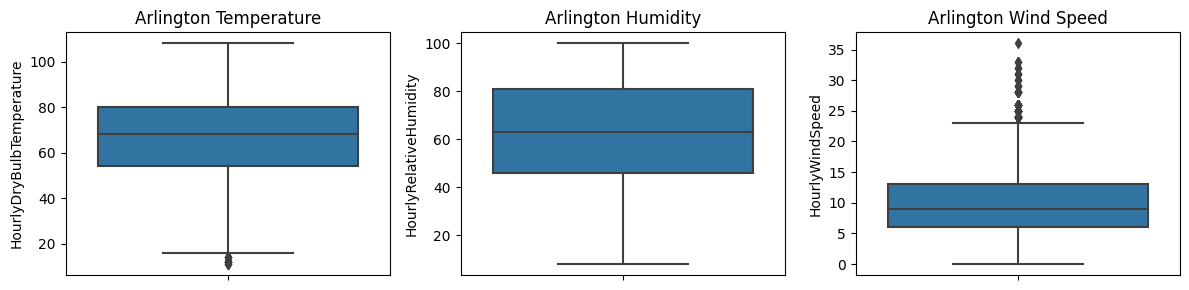

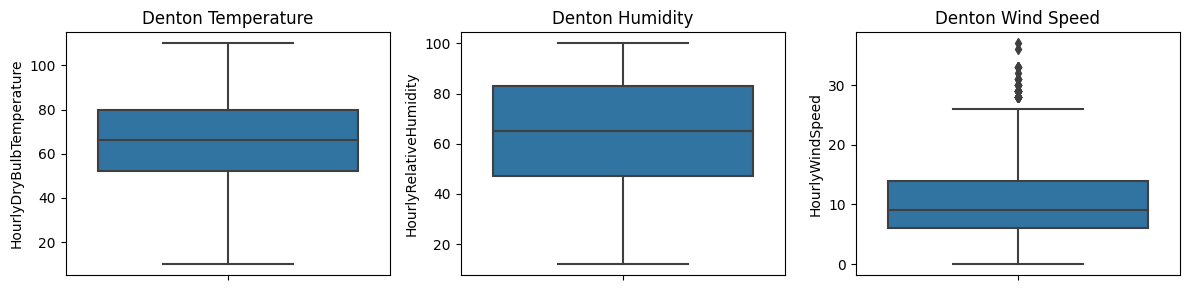

In [37]:
# Plot for each city
plot_data(dallas, 'Dallas')
plot_data(arlington, 'Arlington')
plot_data(denton, 'Denton')

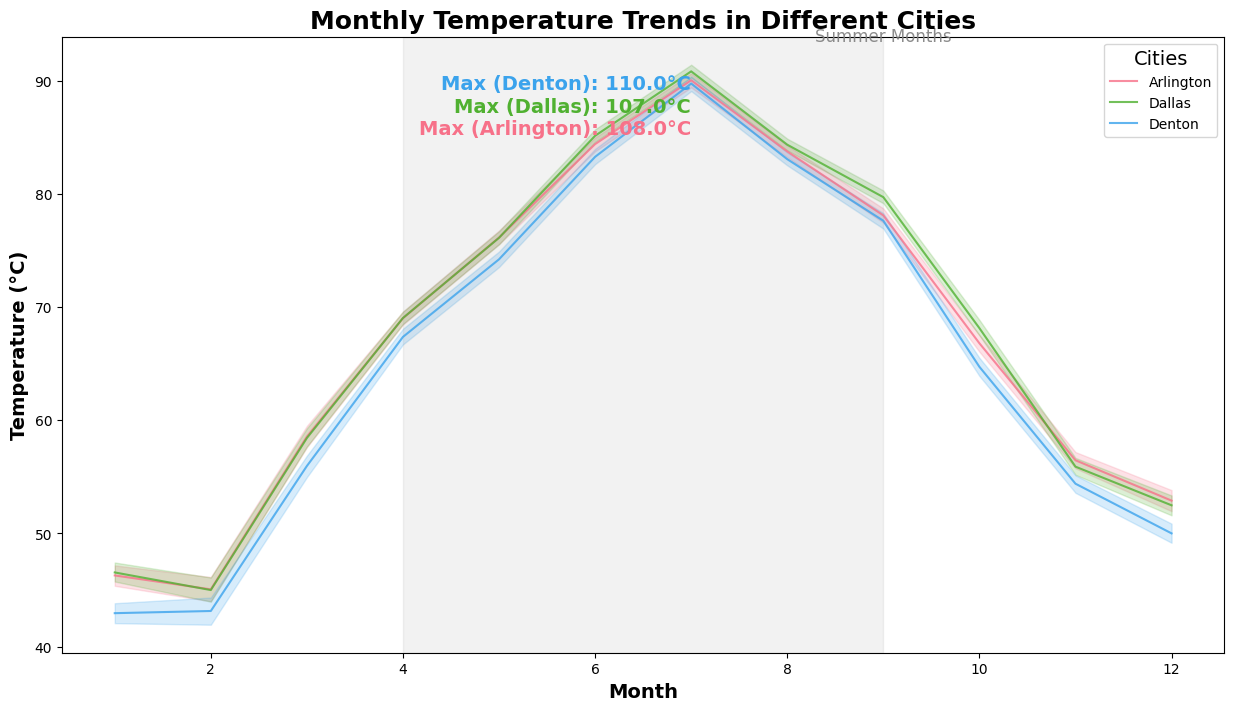

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Month', 'HourlyDryBulbTemperature' are columns in your dataframes

# Set a color palette for better distinction
custom_palette = sns.color_palette('husl', n_colors=3)

# Create a figure with a larger size
plt.figure(figsize=(15, 8))

# Plotting with a line style, removing borders and adding transparency
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=arlington, label='Arlington', color=custom_palette[0], linestyle='-', alpha=0.8)
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=dallas, label='Dallas', color=custom_palette[1], linestyle='-', alpha=0.8)
sns.lineplot(x='Month', y='HourlyDryBulbTemperature', data=denton, label='Denton', color=custom_palette[2], linestyle='-', alpha=0.8)

# Adding data labels at key points
for city, data, color, offset in zip(['Arlington', 'Dallas', 'Denton'], [arlington, dallas, denton], custom_palette, [9, 7, 5]):
    max_temp_month = data.loc[data['HourlyDryBulbTemperature'].idxmax()]['Month']
    max_temp_value = data['HourlyDryBulbTemperature'].max()
    plt.text(max_temp_month, plt.ylim()[1] - offset, f'Max ({city}): {max_temp_value:.1f}°C', fontsize=14, fontweight='bold', ha='right', va='bottom', color=color)

# Customize the title and labels
plt.title('Monthly Temperature Trends in Different Cities', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold')

# Customize the legend
plt.legend(title='Cities', title_fontsize='14', loc='upper right')

# Add a background color to highlight winter months
plt.axvspan(4, 9, alpha=0.1, color='grey')

# Annotate the winter months
plt.text(9, plt.ylim()[1], 'Summer Months', fontsize=12, ha='center', va='center', color='grey', alpha=0.9)

# Show the plot
plt.show()


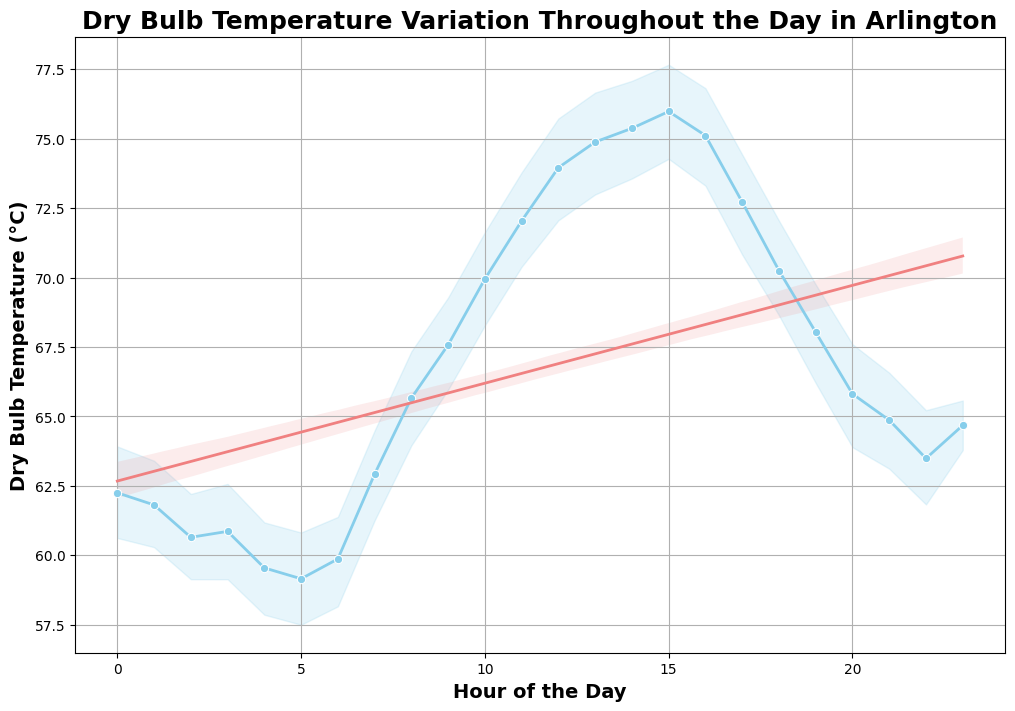

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data creation (replace this with your actual data)
# Assuming 'DATE', 'HourlyDryBulbTemperature' are columns in your dataframe
df = arlington

# Extract the hour from the 'DATE' column
df['Hour'] = pd.to_datetime(df['DATE']).dt.hour

# Set up the plot
plt.figure(figsize=(12, 8))

# Plotting with a line style
sns.lineplot(x=df['Hour'], y=df['HourlyDryBulbTemperature'], data=df, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Adding a smoother line using a regression line
sns.regplot(x=df['Hour'], y=df['HourlyDryBulbTemperature'], data=df, scatter=False, color='lightcoral', line_kws={'linewidth': 2})

# Customize the title and labels
plt.title('Dry Bulb Temperature Variation Throughout the Day in Arlington', fontsize=18, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Dry Bulb Temperature (°C)', fontsize=14, fontweight='bold')

# Show the plot
plt.grid(True)
plt.show()


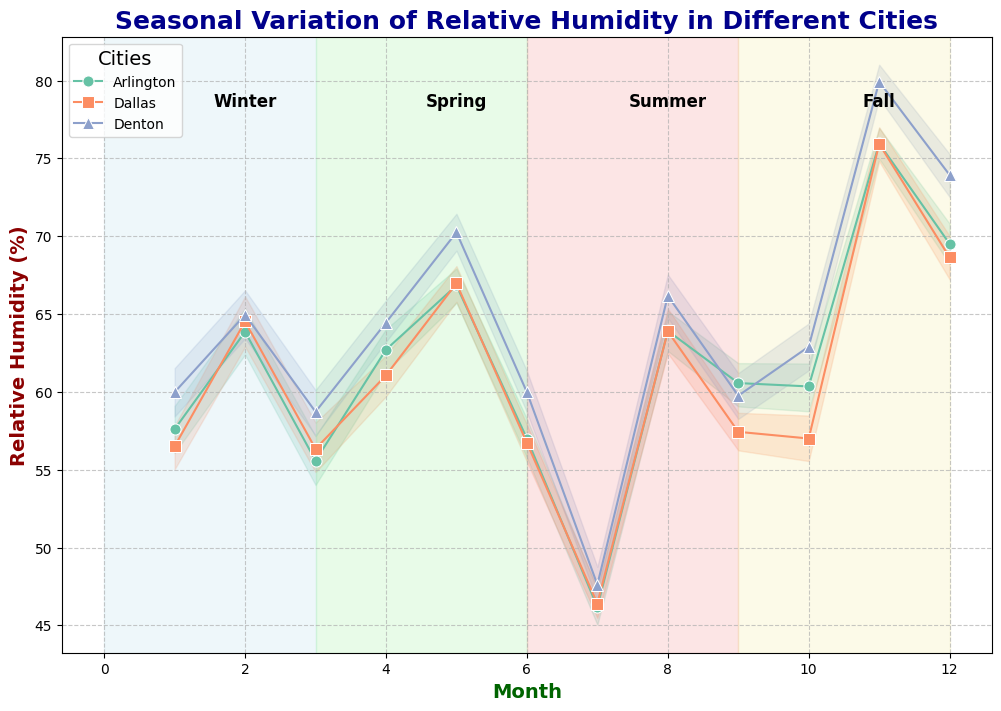

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have DataFrames arlington, dallas, and denton with columns 'DATE' and 'HourlyRelativeHumidity'
# Replace these with your actual data

# Sample data creation (replace this with your actual data)
# df_arlington, df_dallas, df_denton = ...

# Set up a more vibrant color palette
custom_palette = sns.color_palette("Set2", n_colors=3)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plotting with a line style and markers
sns.lineplot(x=pd.to_datetime(arlington['DATE']).dt.month, y=arlington['HourlyRelativeHumidity'], label='Arlington', color=custom_palette[0], linestyle='-', marker='o', markersize=8)
sns.lineplot(x=pd.to_datetime(dallas['DATE']).dt.month, y=dallas['HourlyRelativeHumidity'], label='Dallas', color=custom_palette[1], linestyle='-', marker='s', markersize=8)
sns.lineplot(x=pd.to_datetime(denton['DATE']).dt.month, y=denton['HourlyRelativeHumidity'], label='Denton', color=custom_palette[2], linestyle='-', marker='^', markersize=8)

# Customize the title and labels
plt.title('Seasonal Variation of Relative Humidity in Different Cities', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Relative Humidity (%)', fontsize=14, fontweight='bold', color='darkred')

# Customize the legend
plt.legend(title='Cities', title_fontsize='14')

# Enhance grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add background colors to highlight seasons with different colors
seasons = [(1, 'Winter', 'lightblue'), (4, 'Spring', 'lightgreen'), (7, 'Summer', 'lightcoral'), (10, 'Fall', 'khaki')]
for month, season_name, color in seasons:
    plt.axvspan(month - 1, month + 2, alpha=0.2, color=color, label=season_name)
    plt.text(month + 1, plt.ylim()[1] * 0.95, season_name, fontsize=12, ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()


### **Feature Engineering**

In [41]:
# Calculate statistics for each season for DALLAS
seasonal_dallas = dallas.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_dallas

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2634.0,67.042932,14.265842,30.0,56.0,69.0,78.0,98.0
Spring,2715.0,67.975059,12.681151,27.0,61.0,69.0,77.0,94.0
Summer,2522.0,86.649202,8.862565,65.0,80.0,86.0,94.0,107.0
Winter,2665.0,48.149829,14.432498,11.0,37.0,49.0,61.0,81.0


In [42]:
# Calculate statistics for each season for ARLINGTON
seasonal_arlington = arlington.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_arlington

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2769.0,66.031157,14.235938,27.000000,55.0,66.779507,76.0,97.0
Spring,2815.0,68.219415,13.080171,21.000000,61.0,70.000000,77.0,95.0
Summer,2582.0,85.899006,9.204437,66.779507,79.0,85.000000,93.0,108.0
Winter,2772.0,48.333656,15.161430,11.000000,36.0,49.000000,62.0,91.6


In [43]:
# Calculate statistics for each season for DENTON
seasonal_denton = denton.groupby('Season')['HourlyDryBulbTemperature'].describe()
seasonal_denton

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Fall,2737.0,64.294286,15.315628,24.0,53.0,65.041063,75.0,99.0
Spring,2786.0,66.098672,14.210371,18.0,58.0,67.000000,76.0,98.0
Summer,2572.0,85.197473,9.804702,64.0,78.0,85.000000,93.0,110.0
Winter,2713.0,45.650136,15.474265,10.0,32.0,47.000000,59.0,81.0


In [44]:
# Calculate the 75th and 50th percentiles for each season
dallas_temp = dallas.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50]).unstack()
dallas_humidity = dallas.groupby('Season')['HourlyRelativeHumidity'].quantile([0.25, 0.75]).unstack()
dallas_wind_speed = dallas.groupby('Season')['HourlyWindSpeed'].quantile([0.25, 0.75]).unstack()

# Display the thresholds
print(dallas_temp)
print(dallas_humidity)
print(dallas_wind_speed)

        0.50  0.75
Season            
Fall    69.0  78.0
Spring  69.0  77.0
Summer  86.0  94.0
Winter  49.0  61.0
        0.25   0.75
Season             
Fall    47.0  83.00
Spring  47.0  77.00
Summer  40.0  68.75
Winter  45.0  84.00
        0.25  0.75
Season            
Fall     5.0   9.0
Spring   7.0  15.0
Summer   6.0  10.0
Winter   5.0  11.0


In [45]:
# Calculate the 75th and 50th percentiles for each season for Arlington
ar_temp = arlington.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50]).unstack()
ar_humidity = arlington.groupby('Season')['HourlyRelativeHumidity'].quantile([0.25, 0.75]).unstack()
ar_wind_speed = arlington.groupby('Season')['HourlyWindSpeed'].quantile([0.25, 0.75]).unstack()

# Display the thresholds
print(ar_temp)
print(ar_humidity)
print(ar_wind_speed)

             0.50  0.75
Season                 
Fall    66.779507  76.0
Spring  70.000000  77.0
Summer  85.000000  93.0
Winter  49.000000  62.0
        0.25  0.75
Season            
Fall    50.0  86.0
Spring  47.5  79.0
Summer  40.0  71.0
Winter  46.0  85.0
        0.25  0.75
Season            
Fall     3.0  10.0
Spring   7.0  16.0
Summer   6.0  11.0
Winter   5.0  13.0


In [46]:
# Calculate the 75th and 50th percentiles for each season for Denton
denton_temp = denton.groupby('Season')['HourlyDryBulbTemperature'].quantile([0.75, 0.50]).unstack()
denton_humidity = denton.groupby('Season')['HourlyRelativeHumidity'].quantile([0.25, 0.75]).unstack()
denton_wind_speed = denton.groupby('Season')['HourlyWindSpeed'].quantile([0.25, 0.75]).unstack()

# Display the thresholds
print(denton_temp)
print(denton_humidity)
print(denton_wind_speed)

             0.50  0.75
Season                 
Fall    65.041063  75.0
Spring  67.000000  76.0
Summer  85.000000  93.0
Winter  47.000000  59.0
        0.25  0.75
Season            
Fall    51.0  90.0
Spring  50.0  81.0
Summer  41.0  74.0
Winter  50.0  86.0
        0.25  0.75
Season            
Fall     5.0  10.0
Spring   7.0  17.0
Summer   6.0  11.0
Winter   5.0  13.0


In [47]:
def classify_uhi(row, temp_thresholds, humidity_thresholds, wind_speed_thresholds):
    season = row['Season']
    temp = row['HourlyDryBulbTemperature']
    humidity = row['HourlyRelativeHumidity']
    wind_speed = row['HourlyWindSpeed']

    # Get the thresholds for the current season
    temp_high = temp_thresholds.loc[season, 0.75]
    temp_medium = temp_thresholds.loc[season, 0.50]
    humidity_low = humidity_thresholds.loc[season, 0.25]
    wind_speed_low = wind_speed_thresholds.loc[season, 0.25]

    # Classify based on combined criteria
    if temp > temp_high and humidity < humidity_low and wind_speed < wind_speed_low:
        return 'High'
    elif temp > temp_medium:
        return 'Medium'
    else:
        return 'Low'

In [48]:
# Apply the function
dallas['UHI Intensity'] = dallas.apply(lambda row: classify_uhi(row, dallas_temp, dallas_humidity, dallas_wind_speed), axis=1)
arlington['UHI Intensity'] = arlington.apply(lambda row: classify_uhi(row, ar_temp, ar_humidity, ar_wind_speed), axis=1)
denton['UHI Intensity'] = denton.apply(lambda row: classify_uhi(row, denton_temp, denton_humidity, denton_wind_speed), axis=1)

In [49]:
# for Dallas
print(dallas['UHI Intensity'].value_counts())

Low       5398
Medium    4996
High       142
Name: UHI Intensity, dtype: int64


In [50]:
# for Arlington
print(arlington['UHI Intensity'].value_counts())

Low       5607
Medium    5241
High        90
Name: UHI Intensity, dtype: int64


In [51]:
# for Denton
print(denton['UHI Intensity'].value_counts())

Low       5553
Medium    5151
High       104
Name: UHI Intensity, dtype: int64


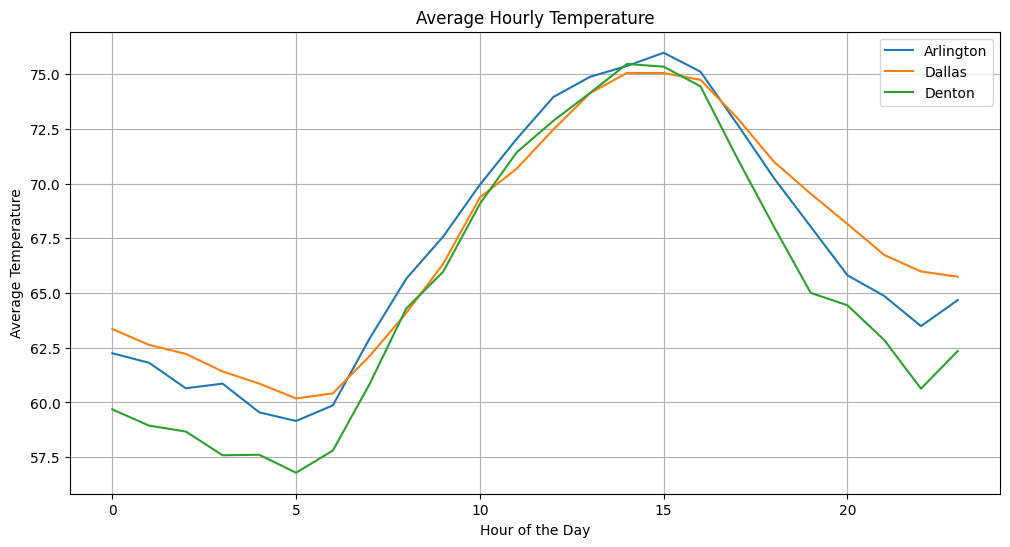

In [52]:
# Calculate the average temperature for each hour of the day for each city
arlington_hourly_avg = arlington.groupby('Hour')['HourlyDryBulbTemperature'].mean()
dallas_hourly_avg = dallas.groupby('Hour')['HourlyDryBulbTemperature'].mean()
denton_hourly_avg = denton.groupby('Hour')['HourlyDryBulbTemperature'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(arlington_hourly_avg, label='Arlington')
plt.plot(dallas_hourly_avg, label='Dallas')
plt.plot(denton_hourly_avg, label='Denton')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Temperature')
plt.title('Average Hourly Temperature')
plt.legend()
plt.grid(visible=True)
plt.show()

###Arima Model - Time Series Analysis

Check for unique values and unwanted values

In [53]:
unique_values_denton = denton['UHI Intensity'].unique()
unique_values_dallas = dallas['UHI Intensity'].unique()
unique_values_arlington = arlington['UHI Intensity'].unique()

print("Unique Values in Denton UHI Intensity:", unique_values_denton)
print("Unique Values in Dallas UHI Intensity:", unique_values_dallas)
print("Unique Values in Arlington UHI Intensity:", unique_values_arlington)

Unique Values in Denton UHI Intensity: ['Medium' 'Low' 'High']
Unique Values in Dallas UHI Intensity: ['Medium' 'Low' 'High']
Unique Values in Arlington UHI Intensity: ['Medium' 'Low' 'High']


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [55]:
data = dallas[['DATE', 'UHI Intensity']]
print(data.columns)

Index(['DATE', 'UHI Intensity'], dtype='object')


In [56]:
# Print column names and structure of the DataFrame
print(data.columns)
print(data.head())

Index(['DATE', 'UHI Intensity'], dtype='object')
                 DATE UHI Intensity
0 2022-01-01 00:53:00        Medium
1 2022-01-01 01:53:00        Medium
2 2022-01-01 02:53:00        Medium
3 2022-01-01 03:53:00        Medium
4 2022-01-01 04:53:00        Medium


In [57]:
# Map categorical values to numeric values
intensity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Create a copy of the DataFrame
df_copy = df.copy()

# Modify the 'UHI Intensity' column in the copied DataFrame
df_copy['UHI Intensity'] = df_copy['UHI Intensity'].map(intensity_mapping)


In [58]:
# Keep only the specified columns in df_copy
df_copy = df_copy[['DATE', 'UHI Intensity']]
df_copy

,DATE,UHI Intensity
0,2022-01-01 00:18:00,2
1,2022-01-01 00:27:00,2
2,2022-01-01 00:53:00,2
3,2022-01-01 01:53:00,2
4,2022-01-01 02:53:00,2
...,...,...
10933,2022-12-31 21:53:00,2
10934,2022-12-31 22:53:00,2
10935,2022-12-31 23:53:00,2
10936,2022-12-31 23:59:00,2


In [59]:
# Display the unique date formats in the 'DATE' column
unique_date_formats = df_copy['DATE'].apply(lambda x: pd.to_datetime(x, errors='coerce')).dropna().unique()

# Print the unique date formats
print("Unique Date Formats in 'DATE' column:")
print(unique_date_formats)


Unique Date Formats in 'DATE' column:
['2022-01-01T00:18:00.000000000' '2022-01-01T00:27:00.000000000'
 '2022-01-01T00:53:00.000000000' ... '2022-12-31T22:53:00.000000000'
 '2022-12-31T23:53:00.000000000' '2022-12-31T23:59:00.000000000']


In [60]:
# Assuming 'DATE' is the original datetime column
# Set the minutes to '00'
df_copy['DATE'] = df_copy['DATE'].dt.floor('H')

# Drop duplicate timestamps
df_copy = df_copy[~df_copy.index.duplicated(keep='first')]

# Display the updated DataFrame
print(df_copy)


                     DATE  UHI Intensity
0     2022-01-01 00:00:00              2
1     2022-01-01 00:00:00              2
2     2022-01-01 00:00:00              2
3     2022-01-01 01:00:00              2
4     2022-01-01 02:00:00              2
...                   ...            ...
10933 2022-12-31 21:00:00              2
10934 2022-12-31 22:00:00              2
10935 2022-12-31 23:00:00              2
10936 2022-12-31 23:00:00              2
10937 2022-12-31 23:00:00              2

[10938 rows x 2 columns]


In [61]:
# Print the columns in the DataFrame
print("Columns in the DataFrame:", df_copy.columns)


Columns in the DataFrame: Index(['DATE', 'UHI Intensity'], dtype='object')


In [62]:
# Print the sum of duplicate values in the 'DATE' column
print("Sum of duplicate values in 'DATE' column:", df_copy.duplicated(subset=['DATE']).sum())


Sum of duplicate values in 'DATE' column: 2183


In [63]:
# Remove rows with duplicate values in the 'DATE' column
df_copy = df_copy.drop_duplicates(subset=['DATE'])

In [64]:
# Map categorical values to numeric values
intensity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Assuming 'UHI Intensity' is the target column
df['UHI Intensity'] = df['UHI Intensity'].map(intensity_mapping)

# Convert the 'UHI Intensity' column to numeric (if there are still non-numeric values)
df['UHI Intensity'] = pd.to_numeric(df['UHI Intensity'], errors='coerce')

# Assuming 'DATE' is the original datetime column
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Resample 'UHI Intensity' to hourly frequency and fill missing values
df_resampled = df['UHI Intensity'].resample('H').mean().ffill()

# Round off the mean values
df_resampled = df_resampled.round()

# Display the resulting DataFrame
print(df_resampled)


DATE
2022-01-01 00:00:00    2.0
2022-01-01 01:00:00    2.0
2022-01-01 02:00:00    2.0
2022-01-01 03:00:00    2.0
2022-01-01 04:00:00    2.0
                      ... 
2022-12-31 19:00:00    2.0
2022-12-31 20:00:00    2.0
2022-12-31 21:00:00    2.0
2022-12-31 22:00:00    2.0
2022-12-31 23:00:00    2.0
Freq: H, Name: UHI Intensity, Length: 8760, dtype: float64


In [65]:
df_resampled.to_csv('df_copy.csv', index=False)

In [66]:
# Assuming df_resampled is your resampled DataFrame
unique_values_df_resampled = df_resampled.unique()

print("Unique Values in Data UHI Intensity:", unique_values_df_resampled)

# Calculate and print the sum of each unique value
for unique_value in unique_values_df_resampled:
    sum_value = df_resampled[df_resampled == unique_value].sum()
    print(f"Sum for {unique_value}: {sum_value}")


Unique Values in Data UHI Intensity: [2. 1. 3.]
Sum for 2.0: 8972.0
Sum for 1.0: 4186.0
Sum for 3.0: 264.0


In [67]:
check1 = df_resampled

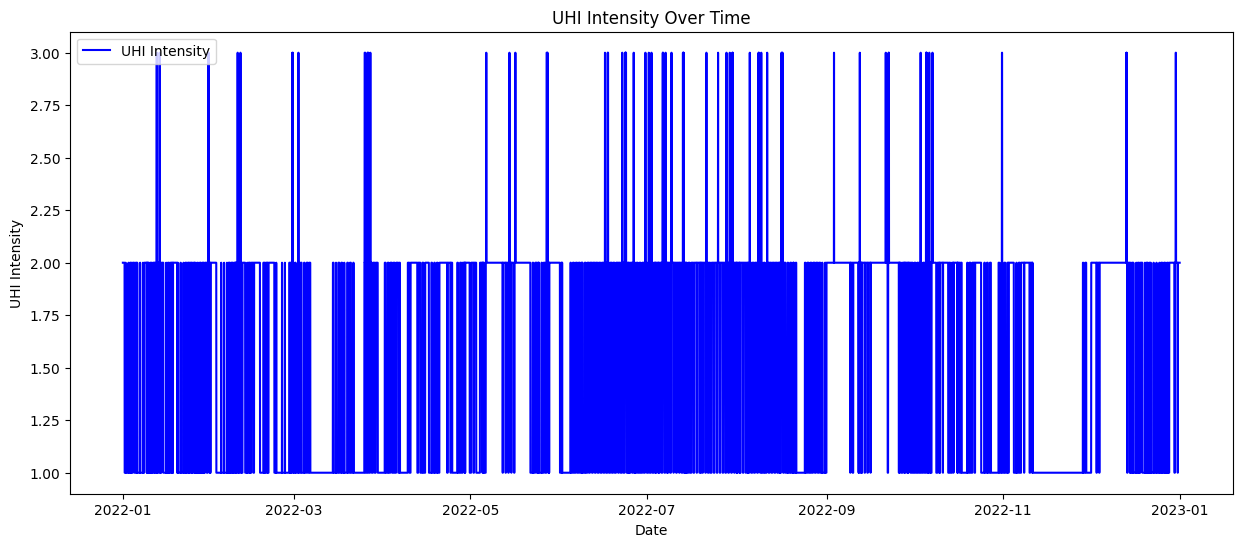

In [68]:
# Assuming 'Date' is the index
plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled, label='UHI Intensity', color='blue')
plt.title('UHI Intensity Over Time')
plt.xlabel('Date')
plt.ylabel('UHI Intensity')
plt.legend()
plt.show()

<Axes: xlabel='DATE'>

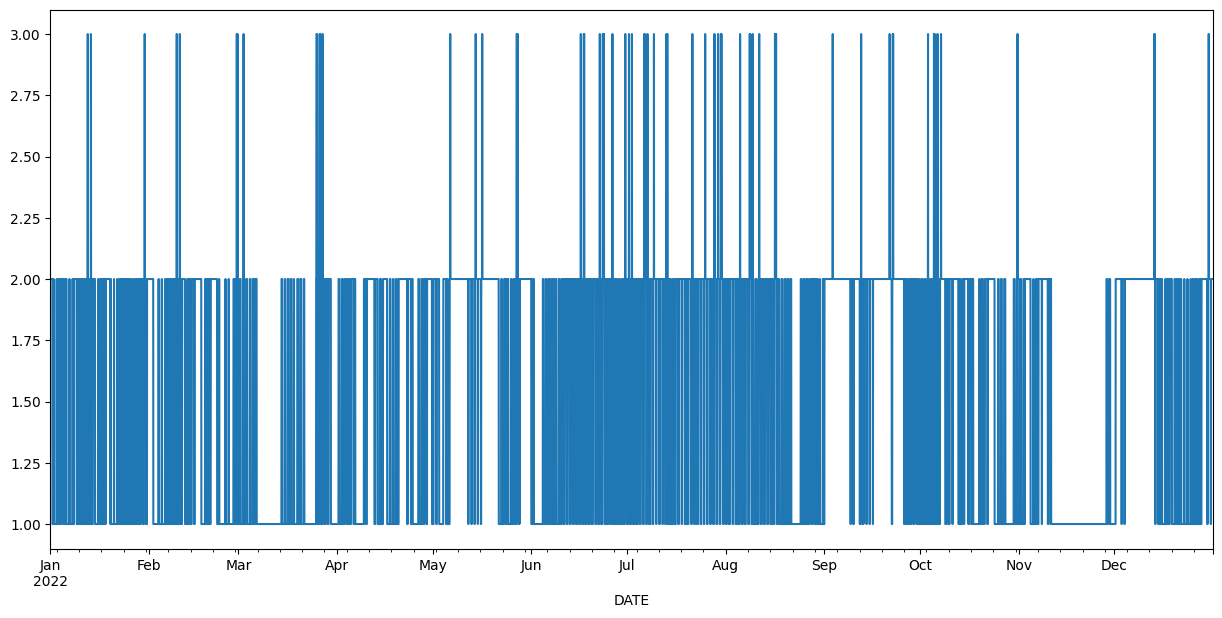

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_resampled.plot()

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
test_result = adfuller(df_resampled)

In [72]:
def adfuller_test(uhi):
  result = adfuller(uhi)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
  for value,label in zip(result, labels):
    print(label+' : ' +str(value))

  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_resampled)

ADF Test Statistic : -8.29976852583647
p-value : 4.04794158827905e-13
#Lags Used : 31
Number of Observations : 8728
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [73]:
# Convert 'UHI Intensity' to numeric
df_resampled = pd.to_numeric(df_resampled, errors='coerce')

# Calculate the first and seasonal differences
df_resampled_diff = df_resampled - df_resampled.shift(1)
df_resampled_seasonal_diff = df_resampled - df_resampled.shift(12)

<Axes: xlabel='DATE'>

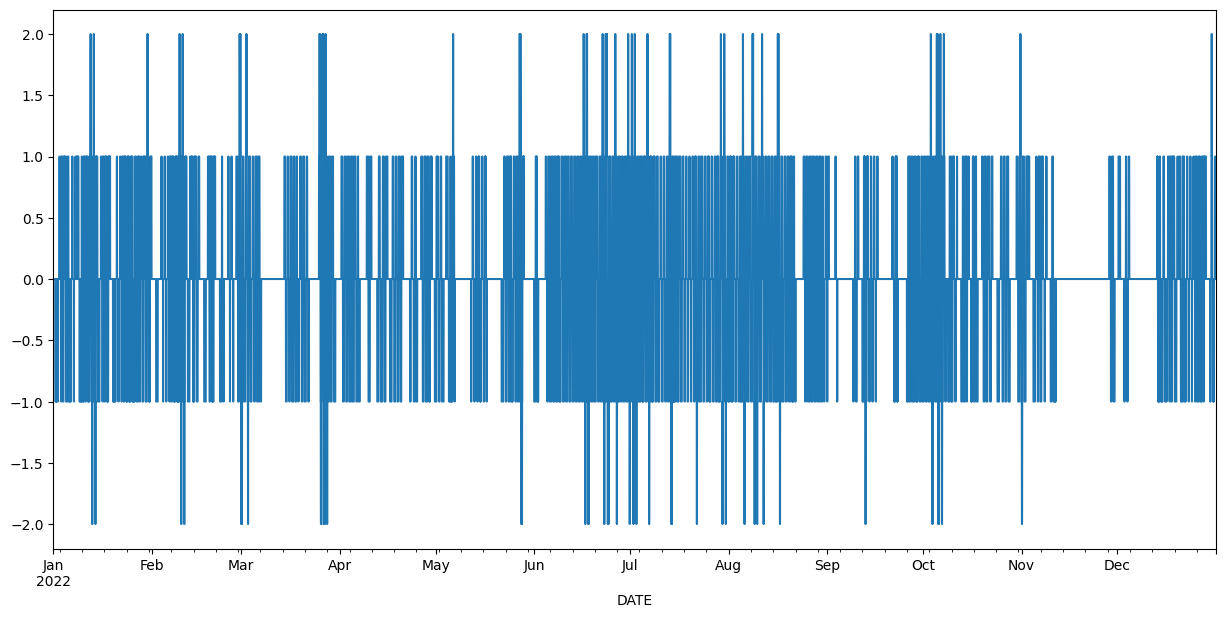

In [74]:
df_resampled_seasonal_diff.plot()

In [75]:
unique_values_Sea = df_resampled.unique()

print("Unique Values in Sea UHI Intensity:", unique_values_Sea)

Unique Values in Sea UHI Intensity: [2. 1. 3.]


Create Auto-Correlation

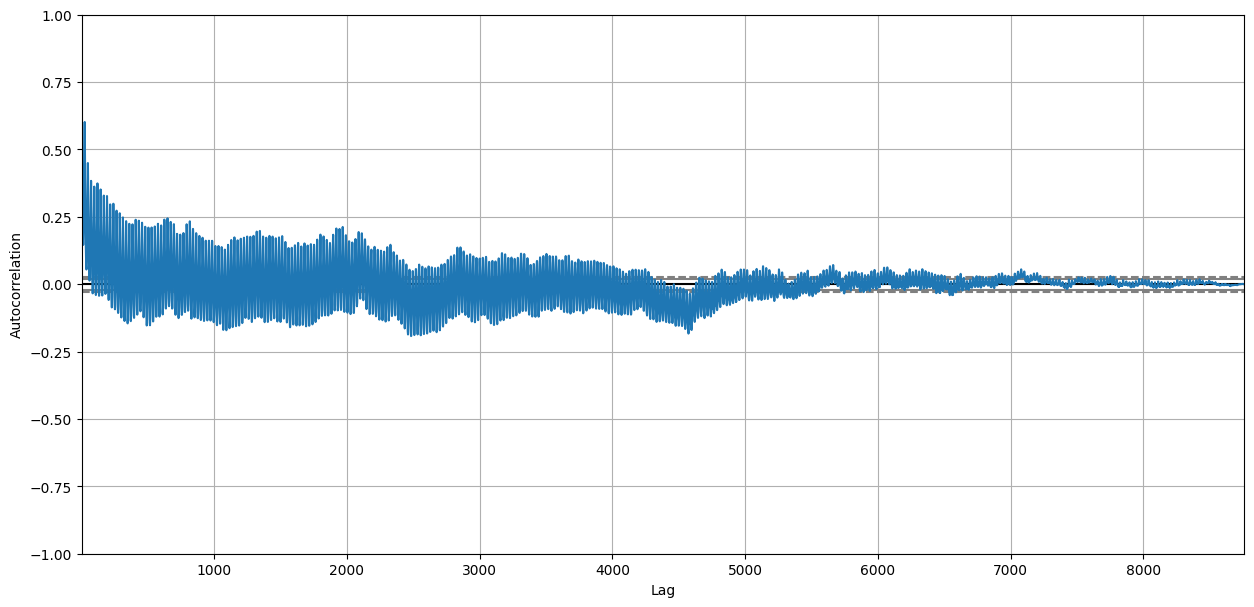

In [76]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_resampled)
plt.show()

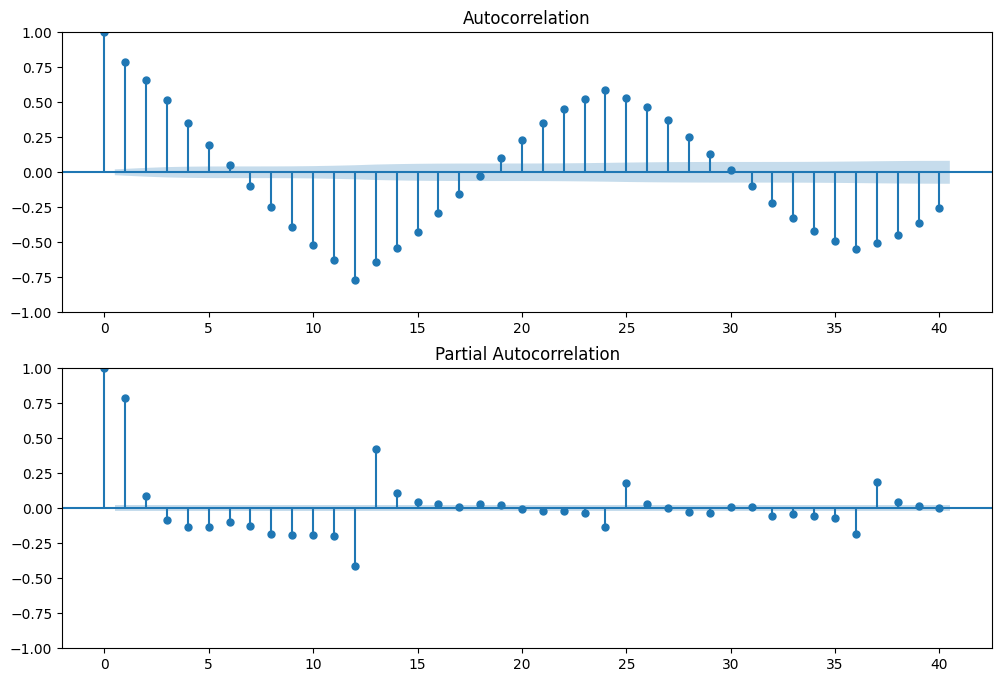

In [77]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_resampled_seasonal_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_resampled_seasonal_diff.dropna(),lags=40,ax=ax2)

In [78]:
# Assuming df_resampled is your resampled DataFrame
unique_values_df_resampled = df_resampled.unique()

print("Unique Values in Data UHI Intensity:", unique_values_df_resampled)

# Calculate and print the sum of each unique value
for unique_value in unique_values_df_resampled:
    sum_value = df_resampled[df_resampled == unique_value].sum()
    print(f"Sum for {unique_value}: {sum_value}")

Unique Values in Data UHI Intensity: [2. 1. 3.]
Sum for 2.0: 8972.0
Sum for 1.0: 4186.0
Sum for 3.0: 264.0


In [79]:
from statsmodels.tsa.arima.model import ARIMA

# Example usage of ARIMA model
# Replace the order parameter with the appropriate values for your data
order = (2, 1, 3)  # p, d, q are the ARIMA model parameters
model = ARIMA(df_resampled, order=order)
results = model.fit()
model_fit=model.fit()
# Print the summary of the ARIMA model
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          UHI Intensity   No. Observations:                 8760
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1410.312
Date:                Tue, 05 Dec 2023   AIC                           2832.623
Time:                        14:29:05   BIC                           2875.090
Sample:                    01-01-2022   HQIC                          2847.093
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6550      0.035     47.724      0.000       1.587       1.723
ar.L2         -0.7158      0.028    -25.890      0.000      -0.770      -0.662
ma.L1         -1.9588      0.036    -54.325      0.0

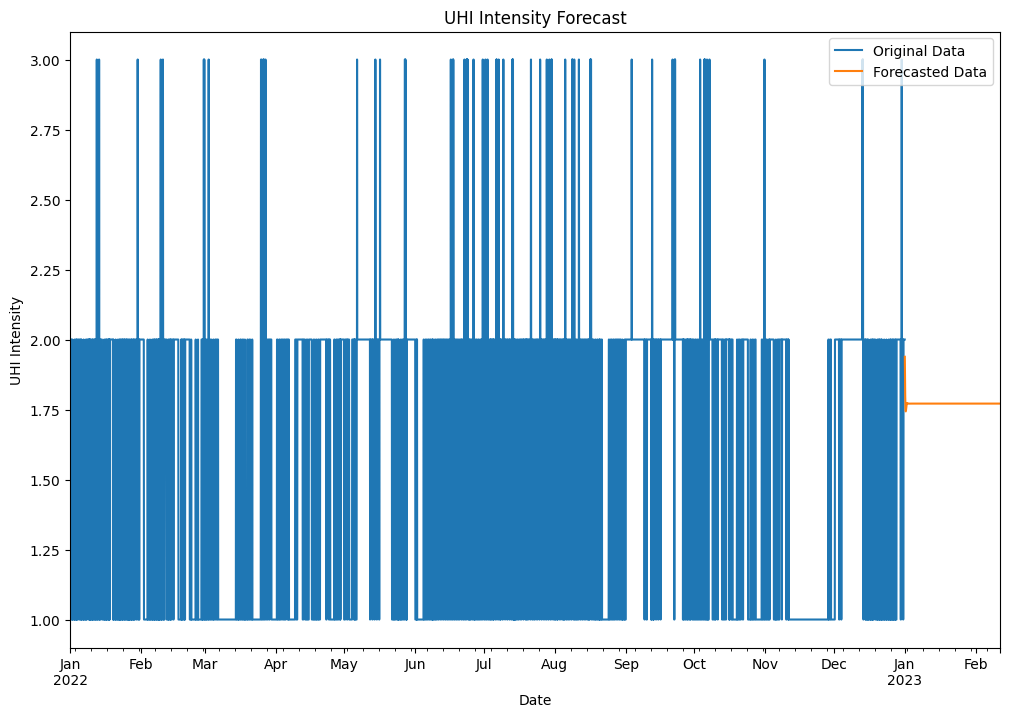

In [80]:
# Forecasting
forecast_steps = 1000  # Replace with the number of steps you want to forecast
df_resampled_forecast = model_fit.forecast(steps=forecast_steps)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot original data from df_resampled
df_resampled.plot(ax=ax, label='Original Data')

# Create a DataFrame for the forecasted data
forecast_dates = pd.date_range(start=df_resampled.index[-1], periods=forecast_steps + 1, freq='H')[1:]  # Assuming hourly frequency
df_resampled_forecast = pd.Series(index=forecast_dates, data=df_resampled_forecast)

# Plot forecasted data from df_resampled_forecast
df_resampled_forecast.plot(ax=ax, label='Forecasted Data')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity Forecast')
plt.legend()

# Show the plot
plt.show()

In [81]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Generating a SARIMA forecast
model = sm.tsa.statespace.SARIMAX(df_resampled, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

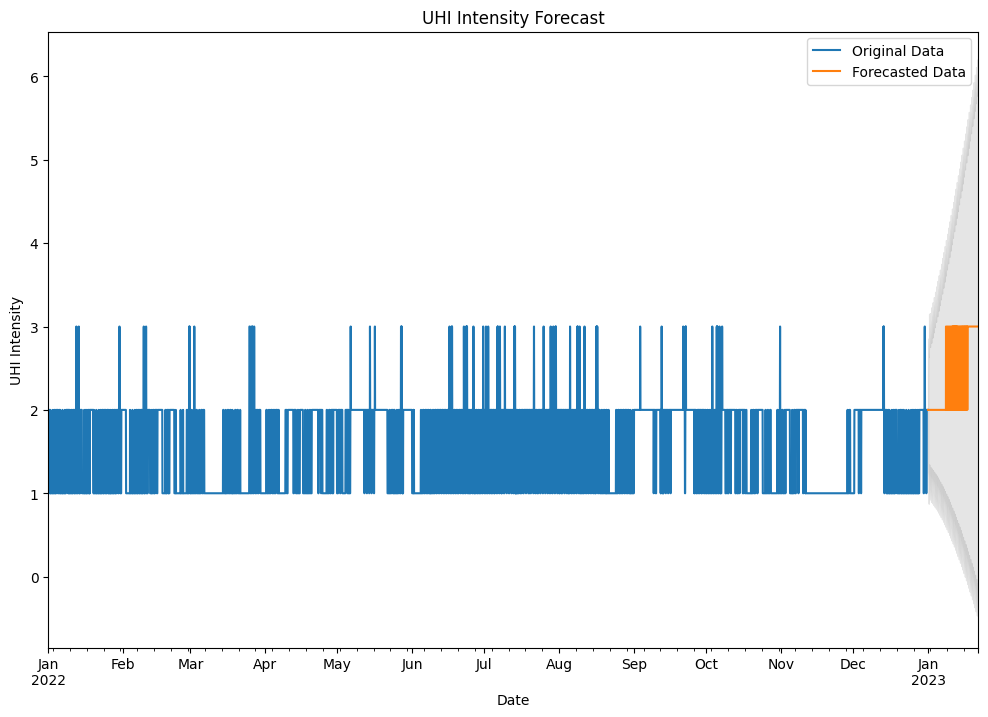

In [82]:
# Forecasting
forecast_steps = 500  # Replace with the number of steps you want to forecast
df_resampled_forecast = results.get_forecast(steps=forecast_steps)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot original data from df_resampled
df_resampled.plot(ax=ax, label='Original Data')

# Plot forecasted data from df_resampled_forecast
df_resampled_forecast.predicted_mean.round().plot(ax=ax, label='Forecasted Data')

# 95% confidence intervals:
ci = df_resampled_forecast.conf_int(alpha=0.05)
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='k', alpha=0.1)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity Forecast')
plt.legend()

# Show the plot
plt.show()


end